In [1]:
import sys
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm
import argparse
import yaml
from spacepy import pycdf

In [2]:
sys.path.append('/home/schiavazza/code/hpe/hpe-core/datasets/')

In [3]:
from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def measure_error(sequence_path, delay, dynamic=True):
    head, sequence_name = os.path.split(sequence_path)

    if dynamic:
        dvs_file_path = os.path.join(sequence_path, "atis-d")
        annotated_path = os.path.join(sequence_path, "atis_d_frames/labeled_points.yml")
        calib_path = os.path.join(head, "calib-d.txt")
        extrinisc_path = os.path.join(head, "extrinsic_d.npy")
    else:
        dvs_file_path = os.path.join(sequence_path, "atis-s")
        annotated_path = os.path.join(sequence_path, "atis_s_frames/labeled_points.yml")
        calib_path = os.path.join(head, "calib-d.txt")
        extrinisc_path = os.path.join(head, "extrinsic_s.npy")

    dvs_helper = DvsHelper(dvs_file_path)
    # read the labeled 2d points
    dvs_helper.read_points_labels(annotated_path);
    # extract the time of the labeled points
    labels_times = dvs_helper.labeled_points['times'][:]
    
    c3d_file_path = os.path.join(sequence_path, "../" + sequence_name + ".c3d")
    c3d_helper = C3dHelper(c3d_file_path, delay=delay, camera_markers=dynamic, filter_camera_markers=True)

    vicon_points = c3d_helper.get_vicon_points_interpolated(dvs_helper.labeled_points)
    vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
    # vicon_points_mark = vicon_points
    dvs_helper.labeled_points['times']
    vicon_points_mark['times']
    proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
    proj_helper.import_camera_calbration(calib_path);
    proj_helper.image_points

    T = np.load(extrinisc_path)

    error = proj_helper.measure_error(T)
    # print(f"measured error for d:{delay} -> {error}")
    return error

In [5]:
# Read all the delays calculated and show the results

base_path = "/home/schiavazza/data/hpe/vicon_dataset/processed/"

vicon_d_delays = []
vicon_s_delays = []
errors_d = []
errors_s = []

for root, dirs, files in tqdm(os.walk(base_path)):
    for f in files:
        if f == "vicon_d_delay.txt":
            delay = np.loadtxt(os.path.join(root, f))
            vicon_d_delays.append(delay)
            try:
                error = measure_error(root, delay, True)
                errors_d.append(error)
            except Exception as e:
                print(e)
        if f == "vicon_s_delay.txt":
            delay = np.loadtxt(os.path.join(root, f))
            vicon_s_delays.append(delay)
            try:
                error = measure_error(root, delay, False)
                errors_s.append(error)
            except Exception as e:
                print(e)

vicon_d_delays = np.array(vicon_d_delays)
vicon_s_delays = np.array(vicon_s_delays)
errors_d = np.array(errors_d)
errors_s = np.array(errors_s)

0it [00:00, ?it/s]/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


Selected the option to not use the markers on the camera, the identity transformation will be used instead


3it [00:02,  1.07it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


10it [00:05,  1.97it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


17it [00:08,  2.27it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


24it [00:10,  2.38it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


31it [00:13,  2.45it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


38it [00:16,  2.53it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


45it [00:18,  2.59it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


52it [00:21,  2.67it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


59it [00:23,  2.68it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


66it [00:26,  2.72it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


73it [00:28,  2.73it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


80it [00:31,  2.72it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


87it [00:33,  2.75it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


94it [00:36,  2.73it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


101it [00:39,  2.65it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


108it [00:42,  2.57it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


126it [00:45,  3.66it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


133it [00:48,  3.26it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


140it [00:51,  2.98it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


147it [00:54,  2.71it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


155it [00:57,  2.68it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


162it [01:00,  2.59it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


170it [01:03,  2.56it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


177it [01:06,  2.59it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


186it [01:09,  2.75it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


193it [01:11,  2.74it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


200it [01:14,  2.72it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


207it [01:16,  2.71it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


214it [01:19,  2.71it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


221it [01:22,  2.70it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


228it [01:24,  2.71it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


242it [01:27,  3.52it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


434it [01:35, 22.83it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


518it [01:37, 25.35it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


527it [01:40, 18.35it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


551it [01:43, 14.55it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


579it [01:49,  9.63it/s]

'camera:cam_back'
Selected the option to not use the markers on the camera, the identity transformation will be used instead


585it [01:51,  8.15it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


609it [01:54,  8.10it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


618it [01:57,  6.51it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


627it [01:59,  6.51it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


648it [02:00,  8.36it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


663it [02:03,  7.32it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead
Selected the option to not use the markers on the camera, the identity transformation will be used instead


668it [02:05,  5.26it/s]

'camera:cam_back'
Selected the option to not use the markers on the camera, the identity transformation will be used instead


676it [02:08,  4.29it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


685it [02:11,  3.94it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


694it [02:13,  4.00it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


703it [02:14,  4.66it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


712it [02:17,  4.12it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


721it [02:20,  3.93it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


744it [02:23,  5.35it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


751it [02:26,  4.26it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


760it [02:29,  3.94it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


769it [02:32,  3.63it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


778it [02:35,  3.43it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


896it [02:37, 15.49it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


912it [02:40, 12.34it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


921it [02:43,  9.68it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


930it [02:46,  7.79it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


939it [02:48,  6.61it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


957it [02:53,  5.06it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


962it [02:56,  4.08it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


971it [02:59,  3.88it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


980it [03:02,  3.67it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


989it [03:04,  3.55it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


998it [03:08,  3.27it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1007it [03:11,  3.17it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1016it [03:14,  3.04it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1025it [03:17,  3.08it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1034it [03:19,  3.16it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1043it [03:22,  3.22it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1052it [03:25,  3.27it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1061it [03:27,  3.31it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1070it [03:30,  3.28it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1079it [03:33,  3.35it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1088it [03:35,  3.32it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1097it [03:36,  4.21it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1104it [03:39,  3.49it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1113it [03:43,  3.14it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1131it [03:46,  4.40it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead
[Errno 2] No such file or directory: '/home/schiavazza/data/hpe/vicon_dataset/processed/zhichao/box_s1/atis_d_frames/labeled_points.yml'
Selected the option to not use the markers on the camera, the identity transformation will be used instead


1140it [03:47,  4.95it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1149it [03:50,  4.24it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1158it [03:53,  3.80it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1167it [03:56,  3.63it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1176it [03:59,  3.36it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1185it [04:02,  3.27it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1194it [04:05,  3.21it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1203it [04:07,  3.22it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1212it [04:10,  3.26it/s]

Selected the option to not use the markers on the camera, the identity transformation will be used instead


1229it [04:13,  4.85it/s]


In [9]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#742C81", "#FFA62B", "#1A589F"]) 

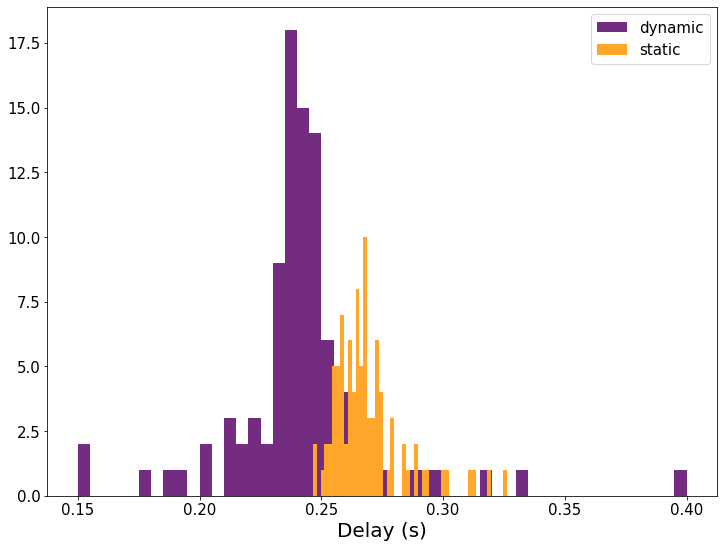

In [22]:
plt.figure(figsize=(12, 9))
plt.tight_layout()
plt.xlabel("Delay (s)", fontsize=20)
plt.hist(vicon_d_delays, 50, label="dynamic");
plt.hist(vicon_s_delays, 50, label="static");
plt.legend(fontsize=15)

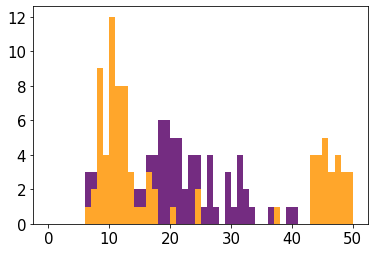

In [11]:
plt.hist(errors_d, 50, range=(0, 50));
plt.hist(errors_s, 50, range=(0, 50));

In [12]:
print(f"dynamic: mean: {np.mean(vicon_d_delays)}, std: {np.std(vicon_d_delays)}")
print(f"static: mean: {np.mean(vicon_s_delays)}, std: {np.std(vicon_s_delays)}")

dynamic: mean: 0.24237598236245805, std: 0.03024519735355159
static: mean: 0.2691840953152174, std: 0.014839719731467065


In [13]:
print(f"dynamic: mean: {np.mean(errors_d)}, std: {np.std(errors_d)}")
print(f"static: mean: {np.mean(errors_s)}, std: {np.std(errors_s)}")

dynamic: mean: 22.98595997343706, std: 19.904126451344666
static: mean: 26.25144897297023, std: 20.29545784577626


In [8]:
%load_ext line_profiler
%lprun -f measure_error measure_error("/home/schiavazza/data/hpe/vicon_dataset/processed/gaurvi/box_s1", 0.231124800, True)

Timer unit: 1e-09 s

Total time: 3.68674 s
File: /tmp/ipykernel_56718/3419834196.py
Function: measure_error at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def measure_error(sequence_path, delay, dynamic=True):
     2         1      16473.0  16473.0      0.0      head, sequence_name = os.path.split(sequence_path)
     3                                           
     4         1        390.0    390.0      0.0      if dynamic:
     5         1      11614.0  11614.0      0.0          dvs_file_path = os.path.join(sequence_path, "atis-d")
     6         1       4792.0   4792.0      0.0          annotated_path = os.path.join(sequence_path, "atis_d_frames/labeled_points.yml")
     7         1       4337.0   4337.0      0.0          calib_path = os.path.join(head, "calib-d.txt")
     8         1       4272.0   4272.0      0.0          extrinisc_path = os.path.join(head, "extrinsic_d.npy")
     9                        

In [9]:
def test():
    helper = C3dHelper("/home/schiavazza/data/hpe/vicon_dataset/processed/gaurvi/box_s1.c3d", delay=0.26, camera_markers=False, filter_camera_markers=False)

In [10]:
%reload_ext line_profiler
%lprun -f test test()


Selected the option to not use the markers on the camera, the identity transformation will be used instead


Timer unit: 1e-09 s

Total time: 0.137046 s
File: /tmp/ipykernel_56718/362671640.py
Function: test at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def test():
     2         1  137046149.0    1e+08    100.0      helper = C3dHelper("/home/schiavazza/data/hpe/vicon_dataset/processed/gaurvi/box_s1.c3d", delay=0.26, camera_markers=False, filter_camera_markers=False)